In [1]:
import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# txtファイルの読み込み
overhead_time_list = []
with open('data/test.txt') as f:
    for line in f:
        overhead_time_list.append(dt.strptime(line[:-8], '%Y-%m-%d %H:%M:%S'))

In [3]:
temp_df = pandas.DataFrame(overhead_time_list, columns=["overhead"])

# 利用する時刻の抽出
dt_list = pandas.date_range(start='2022-06-01', periods=24, freq='H')
dt_list = dt_list[15:]


In [4]:
dt_list

DatetimeIndex(['2022-06-01 15:00:00', '2022-06-01 16:00:00',
               '2022-06-01 17:00:00', '2022-06-01 18:00:00',
               '2022-06-01 19:00:00', '2022-06-01 20:00:00',
               '2022-06-01 21:00:00', '2022-06-01 22:00:00',
               '2022-06-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [5]:
temp_df['scheduled_time'] = dt_list
temp_df['delay'] = temp_df['overhead'] - temp_df['scheduled_time']
temp_df['delay_time'] = temp_df['delay'].dt.total_seconds()/60

In [6]:
temp_df

,overhead,scheduled_time,delay,delay_time
0,2022-06-01 15:16:42,2022-06-01 15:00:00,0 days 00:16:42,16.700000
1,2022-06-01 16:08:12,2022-06-01 16:00:00,0 days 00:08:12,8.200000
2,2022-06-01 17:24:45,2022-06-01 17:00:00,0 days 00:24:45,24.750000
3,2022-06-01 18:22:13,2022-06-01 18:00:00,0 days 00:22:13,22.216667
4,2022-06-01 19:06:05,2022-06-01 19:00:00,0 days 00:06:05,6.083333
5,2022-06-01 20:14:59,2022-06-01 20:00:00,0 days 00:14:59,14.983333
6,2022-06-01 21:16:43,2022-06-01 21:00:00,0 days 00:16:43,16.716667
7,2022-06-01 22:18:38,2022-06-01 22:00:00,0 days 00:18:38,18.633333
8,2022-06-01 23:01:12,2022-06-01 23:00:00,0 days 00:01:12,1.200000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


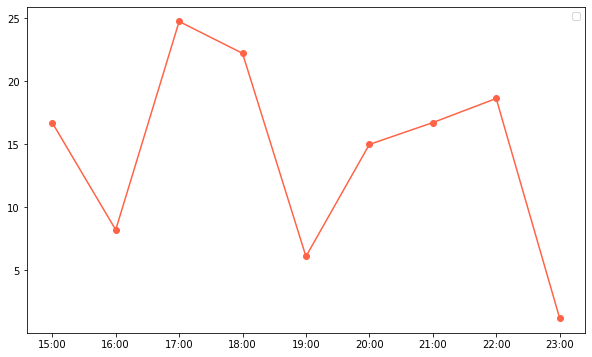

In [7]:
x1 = temp_df['scheduled_time'].dt.hour.astype(str) + ":00"
y1 = temp_df['delay_time']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, color='tomato',  linestyle='-', marker='o')
ax.set_xticks(temp_df['scheduled_time'].dt.hour.astype(str) + ":00")
plt.legend(bbox_to_anchor=(1, 1),loc='upper right')
plt.show()



# 考察

UTCの15:00-23:00では、平均delayが15分くらいであることがわかった。